Method to determine outliers
===============================

The data we use in this example are publically available microarray data.

   * http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE18965

The basic idea here is to summarize a data set with a large number of features in lower dimensional space.  Then using that lower dimensional projection determine in a systematic way if there are outlier samples.

The data are atopic-asthmatic (AA) subjects and healthy-nonasthmatic (HN) controls.

Load data and add some outliers
----------------------------------

In [98]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.covariance import EllipticEnvelope
from IPython.display import Image

In [99]:
mat = np.loadtxt("gse18965.txt")
covs = pd.read_csv("gse18965-targets.csv",usecols=[0,1,2,4,5])
print(covs)
covsAdded = pd.DataFrame([["X","OT",999,11.1,'M'],["Y","OT",998,12.5,"F"]],
                         columns=['sample','phenotype','subject','age','gender'])
covs = covs.append(covsAdded,ignore_index=True)
print(covs)
print mat.shape
print mat.mean(axis=0).shape, mat.mean(axis=0).mean()
mat = np.vstack([mat,mat.mean(axis=0)*1.5])
mat = np.vstack([mat,mat.mean(axis=0)*2])
print mat.shape

       sample phenotype  subject   age gender
0   GSM469509        AA       71  12.6      M
1   GSM469510        AA       78   8.4      F
2   GSM469511        AA       87   7.4      M
3   GSM469512        AA       88   8.2      M
4   GSM469514        AA       98   5.2      F
5   GSM469518        AA      124   7.1      F
6   GSM469520        AA      126   7.1      F
7   GSM469522        AA      128   9.7      M
8   GSM469523        AA      135   7.9      F
9   GSM469508        HN       64   4.6      F
10  GSM469513        HN       97  12.3      F
11  GSM469515        HN      109   1.2      M
12  GSM469516        HN      119   1.8      M
13  GSM469517        HN      122   2.8      M
14  GSM469519        HN      125   4.6      M
15  GSM469521        HN      127   5.1      M
       sample phenotype  subject   age gender
0   GSM469509        AA       71  12.6      M
1   GSM469510        AA       78   8.4      F
2   GSM469511        AA       87   7.4      M
3   GSM469512        AA       88  

Run both PCA and tSNE
------------------------

In [100]:
matScaled = preprocessing.scale(mat)
fit1 = PCA(n_components=2).fit_transform(mat)
fit2 = TSNE(learning_rate=100,perplexity=5).fit_transform(mat)
fit3 = PCA(n_components=2).fit_transform(matScaled)
fit4 = TSNE(learning_rate=100,perplexity=5).fit_transform(matScaled)

def make_subplot(fit,covs,covariate,ax,pcX=0,pcY=1,fontSize=10,fontName='sans serif',ms=20,leg=True,title=None):
    colors = ['k','cyan','r','orange','g','b','magenta']
    cvNames = np.sort(np.unique(covs[covariate]))
    lines = []
    for _i,i in enumerate(cvNames):
        indices = np.where(covs[covariate]==i)[0]
        s = ax.scatter(fit[indices,pcX],fit[indices,pcY],c=colors[_i],s=ms,label=covariate,alpha=0.9)
        lines.append(s)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(fontSize-2)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(fontSize-2)

    buff = 0.02
    bufferX = buff * (fit[:,pcX].max() - fit[:,pcX].min())
    bufferY = buff * (fit[:,pcY].max() - fit[:,pcY].min())
    ax.set_xlim([fit[:,pcX].min()-bufferX,fit[:,pcX].max()+bufferX])
    ax.set_ylim([fit[:,pcY].min()-bufferY,fit[:,pcY].max()+bufferY])
    ax.set_xlabel("D-%s"%str(pcX+1),fontsize=fontSize,fontname=fontName)
    ax.set_ylabel("D-%s"%str(pcY+1),fontsize=fontSize,fontname=fontName)
    plt.locator_params(axis='x',nbins=5)
    ax.set_aspect(1./ax.get_data_ratio())
         
    if title:
        ax.set_title(title,fontsize=fontSize+2,fontname=fontName)
    if leg:
        legend = ax.legend(lines,cvNames,loc='upper right',scatterpoints=1,
                           handletextpad=0.01,labelspacing=0.01,borderpad=0.1,handlelength=1.0)

        for label in legend.get_texts():
            label.set_fontsize(fontSize-2)
            label.set_fontname(fontName)

plt.clf()
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

make_subplot(fit1,covs,'phenotype',ax1,pcX=0,pcY=1,leg=True,title='PCA-raw')
make_subplot(fit2,covs,'phenotype',ax2,pcX=0,pcY=1,leg=False,title='tSNE-raw')
make_subplot(fit3,covs,'phenotype',ax3,pcX=0,pcY=1,leg=False,title='PCA-scaled')
make_subplot(fit4,covs,'phenotype',ax4,pcX=0,pcY=1,leg=False,title='tSNE-scaled')
ax2.set_xlabel("")
ax4.set_xlabel("")
plt.subplots_adjust(hspace=0.3,wspace=0.05)
plt.savefig("outliers-projection.png",dpi=600)

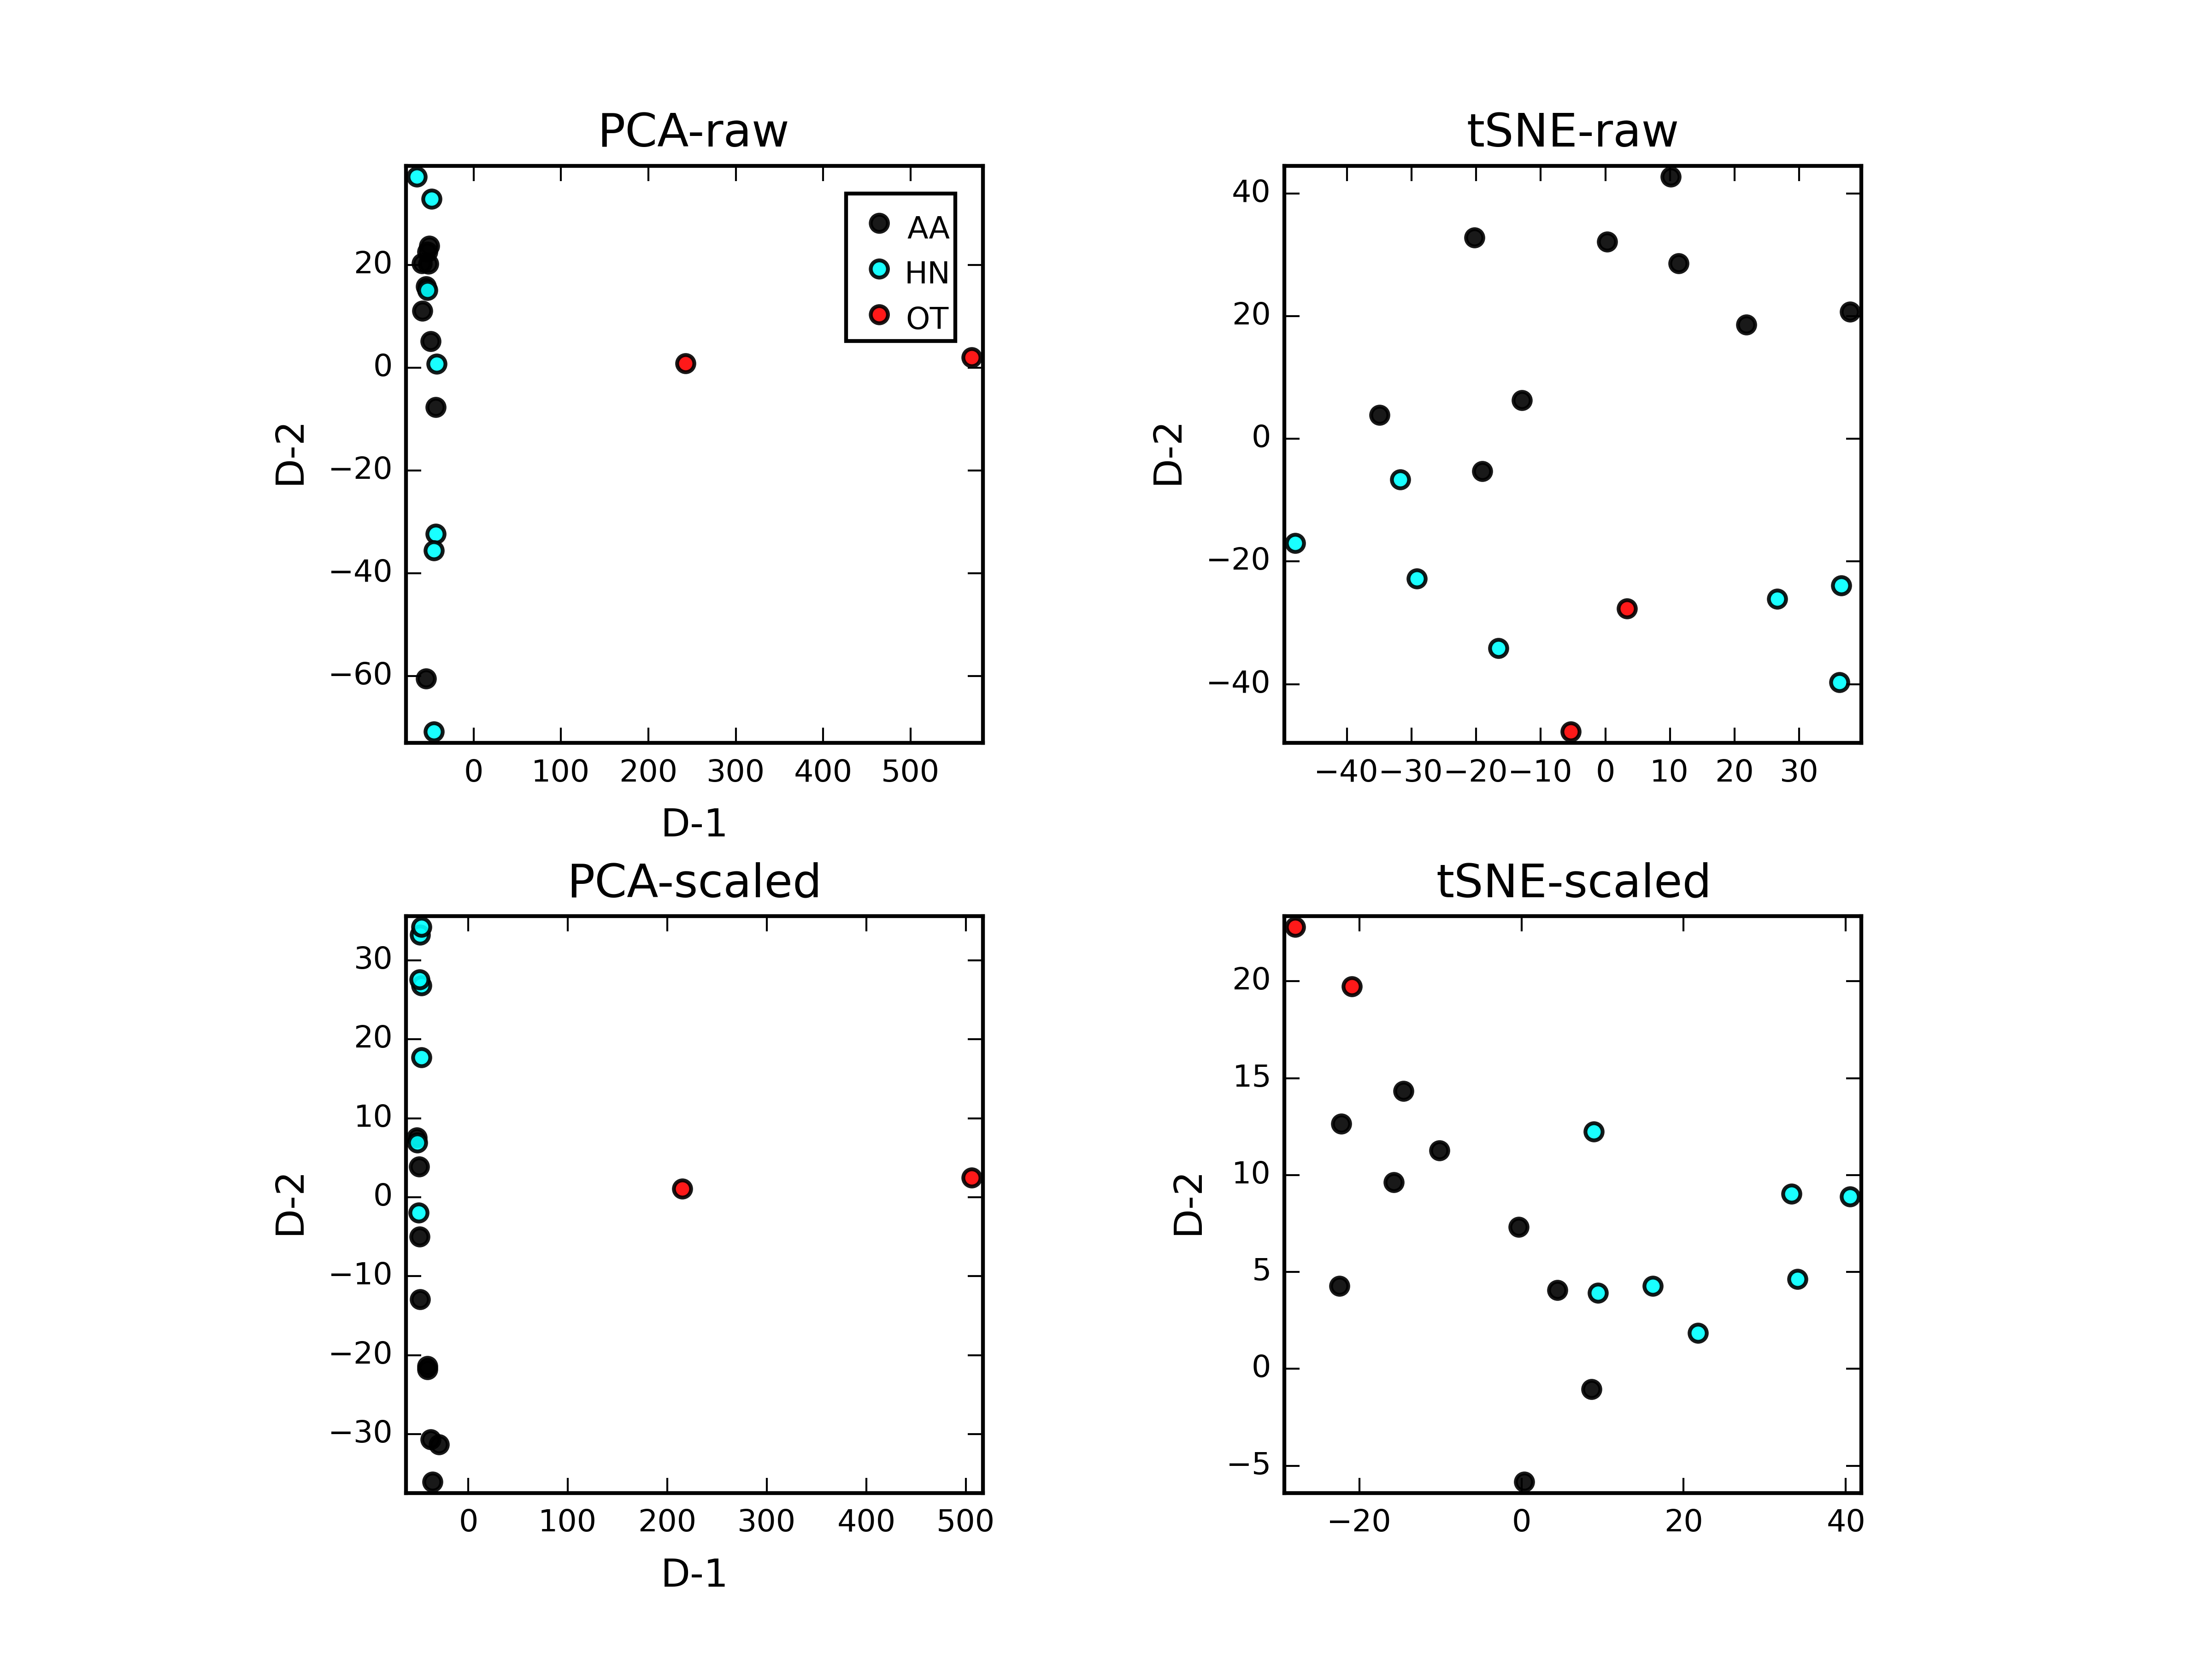

In [101]:
Image(filename='outliers-projection.png')

Because we are not that interested in relative fold change differences, i.e. we do not want the scale of expression differences to dominate the projection we use a standarization.  However, we do see that the AA and HN do separate.

Run the outlier algorithm
---------------------------

In [102]:
2+2

4

Add some outliers
------------------------